In [1]:
import requests
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:

server_url = "http://127.0.0.1:8000"  # Server endpoint
response = requests.get(f"{server_url}/get-global-parameters")
print(response.json())
global_model=response.json()
coef = np.array(global_model['coef']).flatten()  # Use flatten to convert 2D array to 1D if needed
intercept = global_model['intercept_']

node_file = "./Datasets/node8.csv"
data = pd.read_csv(node_file)

# Extract features (all columns except the 9th one)
local_dataset = data.drop(columns=data.columns[9]).values  # Drop the 9th column for features

# Extract labels (9th column)
y_test = data.iloc[:, 9].values  # Select the 9th column for labels

FLregressor = LinearRegression()

FLregressor.coef_ = coef.copy()
FLregressor.intercept_ = intercept

{'coef': [[-54519182460.847046, 96681837459.78032, 49728209346.21484, 49728209346.21124, -101472810574.42804, -101472810574.41035, 49728209346.207855, 49728209346.23288, 49728209346.20652, 0.20068581899007162, -0.032973130544026695, 0.7464227676391602, 0.13673192262649536, 0.02882973353068034, -0.0024730712175369263, 0.05602216720581055]], 'intercept_': 4790973114.601293}


In [3]:
y_pred= FLregressor.predict(local_dataset)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2) #With FL

0.9853847305521553


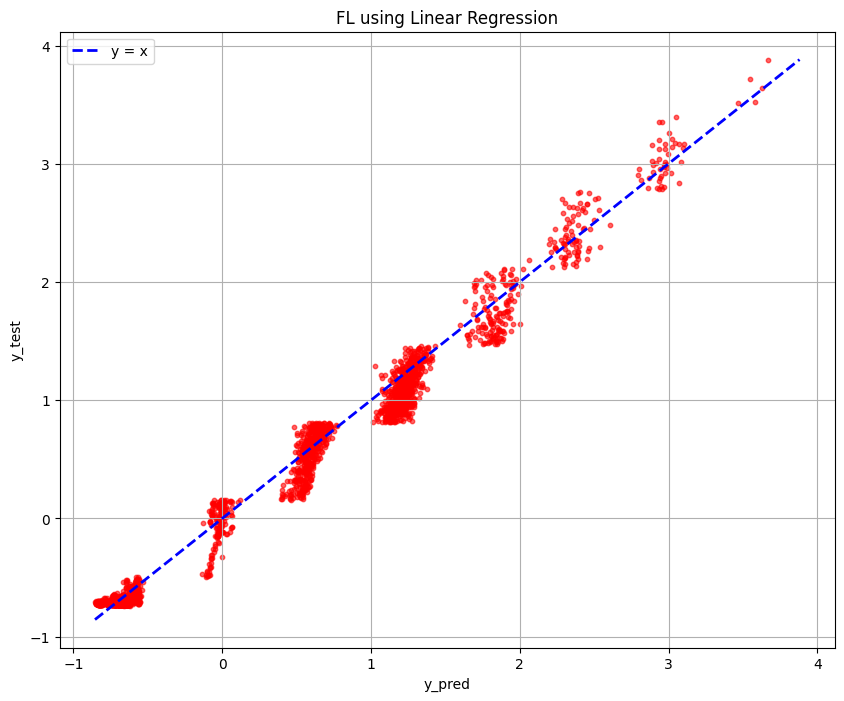

In [4]:
# Increase figure size for better readability
plt.figure(figsize=(10, 8))

# Scatter plot with smaller markers and added transparency
plt.scatter(y_pred, y_test, color='red', s=10, alpha=0.6)

# Plot y=x line with increased thickness for clarity
min_val = min(min(y_pred), min(y_test))
max_val = max(max(y_pred), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', linewidth=2, label='y = x')

# Adding title and labels
plt.title("FL using Linear Regression")
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.legend()  # Show the legend
plt.grid(True)  # Add a grid for easier reading

# Show the plot
plt.show()